## 业务场景

利用用户历史行为数据：'用户标识', '业务类型', '主叫时长（分）', '被叫时长（分）', '免费流量', '计费流量',
          '月均上网时长（分）', '入网时长（天）', '最近一次缴费金额（元）', '总缴费金额(元)', '缴费次数',
          '余额'等信息，
判断是否潜在合约客户 vs 单卡客户：


## 字段信息：
名称       | 说明   | 类型  |
--------------|---------|--------|-----
user_id     |用户标识 | int   |
service_kind  |业务类型 | string | 2G\3G\4G
call_duration|主叫时长（分）|
called_duration|被叫时长（分）
in_package_flux|免费流量
out_package_flux|计费流量
monthly_online_duration|月均上网时长（分）|
net_duration |入网时长（天） |long
last_recharge_value|最近一次缴费金额（元）
total_recharge_value|总缴费金额(元)|
total_recharge_count|缴费次数
balanced|余额（元）|
contractuser_flag|是否潜在合约用户

In [106]:
#导入常用的库
# numpy: python中常用的多维数值计算库，常用简称 np
# pandas:python中的数据分析库，常用简称 pd
# matplotlib :python中的图形库，常用简称plt
# %matplotlib inline：IPython魔法函数（Magic Functions），可以内嵌绘图，并且可以省略掉plt.show()这一步
#约4行代码：

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [107]:
#设定绘图时的中文字体的设置
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

## 读取运营商数据

In [108]:
#使用pandas的读取csv文件的函数 pd.read_csv(),生成数据的dataframe
#数据文件名：carrier_contractuser.csv
#编码格式：utf8
#分隔符： |
#约1行代码:
data= pd.read_csv('../data/carrier_contractuser.csv',encoding ='utf8',sep =',')

#显示前5行:
#约1行代码:
data.head()


,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


In [109]:
#保存英文字段名称：
#提示：使用.columns()方法进行保存
#约1行代码：
en_col = data.columns.tolist()

#中文字段名称
ch_col = ['用户标识', '业务类型', '主叫时长（分）', '被叫时长（分）', '免费流量', '计费流量',
          '月均上网时长（分）', '入网时长（天）', '最近一次缴费金额（元）', '总缴费金额(元)', '缴费次数',
          '余额', '是否潜在合约用户']

#转换为中文字段
#提示：使用.columns()方法进行替换
#约1行代码：
data.columns =ch_col

#显示前5行:
#约1行代码：
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,66069,3G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64410,3G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,60110,3G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,69600,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,64683,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


## 数据探索

In [110]:
#不同用户的主叫时长分布情况对比

#设置dataframe的索引筛选条件
#提示：data[column_name] == value
#约1行代码：
cond = data['是否潜在合约用户']==1

#潜在合约用户的主叫时长（分）分布情况
#提示：使用 dataframe.hist()方法
#约1行代码：
data[cond]['主叫时长（分）'].hist(alpha =0.5,label='潜在合约用户')

#非潜在合约用户的主叫时长（分）分布情况：
#提示：使用 dataframe.hist()方法
#约1行代码：
data[~cond]['主叫时长（分）'].hist(color='r',alpha = 0.5,
                            label='非潜在合约用户')

# 显示图形的标签
#提示：使用 plt.legend()方法
#约1行代码：
plt.legend()

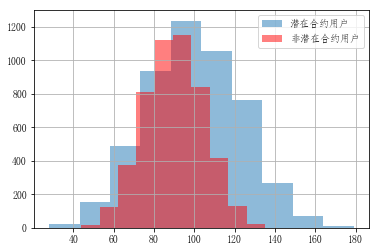

In [111]:
#不同用户的被叫时长分布情况对比

#设置dataframe的索引筛选条件
#提示：data[column_name] == value
#约1行代码：
cond = data['是否潜在合约用户']==1

#潜在合约用户的被叫时长（分）分布情况
#提示：使用 dataframe.hist()方法
#约1行代码：
data[cond]['被叫时长（分）'].hist(alpha =0.5,label='潜在合约用户')

#非潜在合约用户的被叫时长（分）分布情况：
#提示：使用 dataframe.hist()方法
#约1行代码：
data[~cond]['被叫时长（分）'].hist(color='r',alpha = 0.5,
                            label='非潜在合约用户')

# 显示图形的标签
#提示：使用 plt.legend()方法
#约1行代码：
plt.legend()

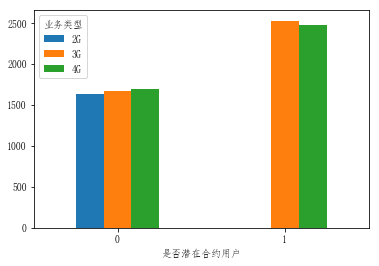

In [112]:
#不同用户的业务类型情况对比

# 对 '是否潜在合约用户','业务类型'两个字段分组统计
#提示：使用 dataframe.groupby()方法，进行分组统计。并且使用unstack()方法，将数据的行“旋转”为列。
#约1行代码：
grouped =data.groupby(['是否潜在合约用户','业务类型'])['用户标识'].count().unstack()

#绘制并列的柱状图
#提示：使用dataframe.plot(kind='bar')方法
#约1行代码：
grouped.plot(kind= 'bar',alpha =1.0,rot = 0)

In [113]:
#对目标数据统计，查看是否平衡
#提示：使用dataframe.value_counts()方法
#约1行代码：
data['是否潜在合约用户'].value_counts()

1    5003
0    4997
Name: 是否潜在合约用户, dtype: int64

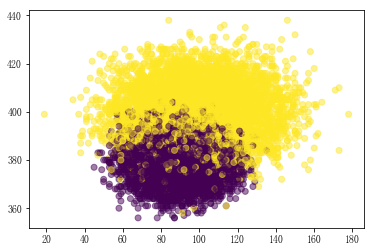

In [114]:
#主叫时长（分）&免费流量 与 是否潜在合约用户的关系\
#约2行代码：
y = data.loc[:,'是否潜在合约用户']
plt.scatter(data.loc[:,'主叫时长（分）'],data.loc[:,'免费流量'],c=y,alpha=0.5)

## 数据预处理

### 类别特征编码

In [115]:
#分割特征数据集和标签数据集
#提示：使用dataframe的i.lloc或者.loc方法选取不同字段（列）
#约2行代码
X = data.loc[:,'业务类型':'余额']
y= data.loc[:,'是否潜在合约用户']

#打印特征数据为X 和目标数据y的形状：
#约2行代码:
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


In [116]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
# 引入  sklearn.preprocessing类中的OneHotEncoder算法库
from sklearn.preprocessing import OneHotEncoder

#自定义转换函数
def service_mapping(cell):
    if cell=='2G':
        return 2
    elif cell=='3G':
        return 3
    elif cell=='4G':
        return 4

#将业务类型的string型值映射为整数型
service_map = X['业务类型'].map(service_mapping)
service = pd.DataFrame(service_map)


#生成用OncHotEncoder实例
enc = OneHotEncoder()

#使用OncHotEncoder转化类型特征为0/1编码的多维特征
service_enc = enc.fit_transform(service).toarray()

# #0/1编码的多维特征的名称
service_names = enc.active_features_.tolist()
service_newname=[str(x)+'G' for x in service_names]

#生成0-1编码的dataframe
service_df = pd.DataFrame(service_enc,columns=service_newname)

#将生成0-1编码的dataframe加入原有特征数据，生成新的特征数据矩阵X_enc 
X_enc = pd.concat([X,service_df],axis = 1).drop('业务类型',axis=1)

X_enc.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,1.0,0.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0.0,1.0,0.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,1.0,0.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,0.0,1.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,0.0,1.0


### 分割训练集和测试集

In [118]:
# 引入sklearn.model_selection的方法train_test_split
from sklearn.model_selection import train_test_split

#按照0.8:0.2的比例，分割训练集和测试集：X_train,X_test,y_train,y_test， random_state=112
#约1行代码：
X_train,X_test,y_train,y_test = train_test_split(X_enc,y,test_size = 0.2, random_state=112)

#打印分割后的训练集和测试集：X_train,X_test,y_train,y_test的形状
#约4行代码:
print('The shape of X_train is {0}'.format(X_train.shape))
print('The shape of X_test is {0}'.format(X_test.shape))
print('The shape of y_train is {0}'.format(y_train.shape))
print('The shape of y_test is {0}'.format(y_test.shape))

The shape of X_train is (8000, 13)
The shape of X_test is (2000, 13)
The shape of y_train is (8000,)
The shape of y_test is (2000,)


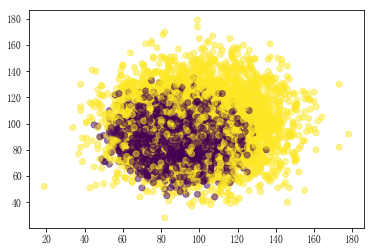

In [119]:
#生成训练集中主叫时长（分）&被叫时长 与 是否潜在合约用户的关系
#约1行代码：
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train,alpha =0.5)

### 训练简单模型 作为baseline model

In [120]:
# 导入sklearn.ensemble中导入GradientBoostingClassifier的算法
from sklearn.ensemble import GradientBoostingClassifier

#建立GBDT模型实例化
clf0 = GradientBoostingClassifier( random_state=110)

#在训练集上训练模型
clf0.fit(X_train,y_train)

#在测试集上预测
y_pred = clf0.predict(X_test)

In [121]:
# 导入模型评估模块
from sklearn import metrics

#计算准确率率
score = metrics.accuracy_score(y_test,y_pred)
print('The accuracy score of the model is: {0}'.format(score))

#查看混淆举证
metrics.confusion_matrix(y_test,y_pred)

The accuracy score of the model is: 0.9825


array([[1028,   10],
       [  25,  937]], dtype=int64)

### 生成模型训练评估函数
该函数将完成以下任务：  
1. 训练模型
2. 计算训练集上的准确率：training accuracy
3. 计算训练集上的AUC值：training AUC
4. 计算测试集上的AUC值：testing AUC
5. 若performCV=True，则进行交叉验证
6. 若printFeatureImportance=True，则答应Feature Importance图形

In [122]:
from sklearn import cross_validation

def modelfit(alg, X_train,y_train, performCV=True, printFeatureImportance=True, cv_folds=5):
    '''
    Input:alg, X_train,y_train, performCV=True, printFeatureImportance=True, cv_folds=5
    oupt:
    '''  
    # 在训练集上训练模型
    alg.fit(X_train, y_train)
    # 在训练集上预测类别
    train_predictions = alg.predict(X_train)
     # 在训练集上预测各类别的概率
    train_predprob = alg.predict_proba(X_train)[:,1]
    #Perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    #Print model report:
    print("\nModel Report")
    #计算训练集上的精度
    print("Accuracy (Train): %3.4f" %metrics.accuracy_score(y_train.values, train_predictions))
    #计算训练集上的AUC值
    #提示: first argument is true values, second argument is predicted probabilities
    print("AUC Score (Train): %f" %metrics.roc_auc_score(y_train,train_predprob))
    #计算交叉验证的描述性统计
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g"\
        % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    
    #打印特征的重要性情况Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,X_train.columns.tolist()).sort_values(ascending=True)
        feat_imp.plot(kind='barh', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        _ = plt.xlabel('Relative importance')


Model Report
Accuracy (Train): 0.9862
AUC Score (Train): 0.999099
CV Score : Mean - 0.9975603 | Std - 0.0004027038 | Min - 0.9969856 | Max - 0.9979951


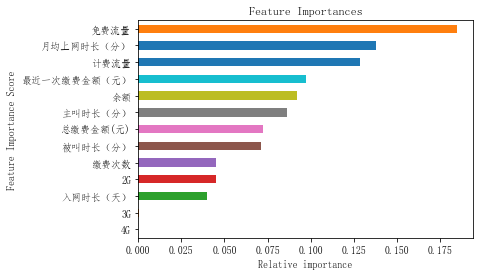

In [123]:
#模型实例化
clf0 = GradientBoostingClassifier(random_state=110)

modelfit(clf0,X_train,y_train)


### GBM Models:

主要分为2类参数：
1. 树相关的参数
  * min_samples_split
  * min_samples_leaf
  * max_depth
  * min_leaf_nodes
  * max_features
  * loss function
2. Boosting相关的参数
  * n_estimators
  * learning_rate
  * subsample

### 调叄主要思路
1. 首先设置较高的学习率learning rate，调试对应的基学习器个数the number of estimators 
2. 在已经设定的学习率和基学习器数量后，调试树相关的参数
3. 调试subsample
4. 降低学习率，成比例的提高基学习器个数，选择最优参数

### Step 1：设定一个相对较高的learning rate，调整对应迭代次数 number of estimators

我们首先设定参数如下：（可根据实际问题和数据适当调整）
1. learning_rate=0.1 or 0.2：  
学习率，即控制基模型带来拟合效果的权重；较低的学习率通常有较好的拟合效果，毕竟步子迈精细一点，在较高的误差处发生震荡的可能性变小了；较低的学习率通常需要辅以较多的基学习器，这也意味着学习效率会降低；  
设定一个相对较高的learning rate作为初始值。

1. n_estimators= range(20,81,10)：  
调整对应基学习器数量 number of estimators的范围  
基学习器的个数，这里是树的颗数；当学习率不变时，较多的基学习器会带来过拟合的风险，一般该参数需要与learning_rate结合调整。

1. min_samples_split = 50~100 : 
这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。  
若样本较均衡，可以设置较大，取总数的~0.5-1%  

2. min_samples_leaf = 5 :   
这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。
这儿可以设置5作为初始值 

3. max_depth = 8 : 
默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。
因为这儿有13个特征，因此可以选择5-10作为初始值。

4. max_features = 'sqrt' :   
可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑log2Nlog2N个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑N−−√N个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比xN）取整后的特征数。其中N为样本总特征数。  
一般以 'sqrt'作为初始值

5. subsample = 0.8 :   
子采样数，每棵树的构建并不会取全部的样本，而是随机抽取一部分样本，参考的也是随机森林的思想，但这里的抽样是不放回抽样；这种方法也是用来降低过拟合的风险；   
通常初始设置取值0.8左右；

6. random_state=10


In [124]:
# 导入sklearn.model_selection类中的网格搜索GridSearchCV()方法
from sklearn.model_selection import GridSearchCV

#设置迭代次数的范围
param_test1 = {'n_estimators':range(20,81,10)}

#建立GradientBoostingClassifier实例
estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=50,
                                       min_samples_leaf=5,max_depth=8,max_features='sqrt', 
                                       subsample=0.8,random_state=10)

#建立网格检索实例
gsearch1 = GridSearchCV(estimator,param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

#在训练集上训练
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [125]:
#显示网格检索的最优分数，最优参数，最优模型
# 提示：使用 GridSearchCV.best_score_
# 提示：GridSearchCV.best_params_
# 提示：GridSearchCV.best_estimator_
#约3行代码：
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print(gsearch1.best_estimator_)

0.9980319708107752
{'n_estimators': 80}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


### Step 2：调整决策树相关的参数
Tune tree-specific parameters
Now, lets move onto tuning the tree parameters. We will do this in 2 stages:
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

#### 1.调试max_features 和 min_samples_split
固定参数learning_rate=0.2, n_estimators=80,

In [65]:
#设定max_depth范围为range(1,9,1), min_samples_split范围为：range(10,101,10)
param_test2 = {'max_depth':range(1,9,1), 'min_samples_split':range(10,101,10)}

#建立GradientBoostingClassifier的实例
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,
                                       max_features='sqrt', subsample=0.8, 
                                       random_state=10)
#建立GridSearchCV实例
gsearch2 = GridSearchCV(estimator,param_grid = param_test2, scoring='roc_auc',
                        n_jobs=4,iid=False, cv=5)

#在训练集上训练
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(1, 9), 'min_samples_split': range(10, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [66]:
#显示网格检索的最优分数，最优参数，最优模型
#约3行代码：
print(gsearch2.best_score_)
print(gsearch2.best_params_)
print(gsearch2.best_estimator_)

0.9983572549633217
{'max_depth': 4, 'min_samples_split': 80}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


#### 调试决策树的相关参数：min_samples_split 和 min_samples_leaf
固定参数learning_rate=0.2, n_estimators=80,max_depth=4

In [68]:
#设置min_samples_split范围range(50,201,20) and min_samples_leaf范围range(5,51,5)
param_test3 = {'min_samples_split':range(50,201,20), 'min_samples_leaf':range(5,51,5)}

#建立GradientBoostingClassifier的实例
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=4,
                                       max_features='sqrt', subsample=0.8, 
                                       random_state=10)

#建立GridSearchCV实例
gsearch3 = GridSearchCV(estimator,param_grid = param_test3, scoring='roc_auc',
                        n_jobs=4,iid=False, cv=5)

#在训练集上训练
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(50, 201, 20), 'min_samples_leaf': range(5, 51, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [69]:
#显示网格检索的最优分数，最优参数，最优模型
#约3行代码：
print(gsearch3.best_score_)
print(gsearch3.best_params_)
print(gsearch3.best_estimator_)

0.998444417695865
{'min_samples_leaf': 5, 'min_samples_split': 130}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=130,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)



Model Report
Accuracy (Train): 0.9954
AUC Score (Train): 0.999765
CV Score : Mean - 0.9984444 | Std - 0.0004340977 | Min - 0.9977341 | Max - 0.9990155


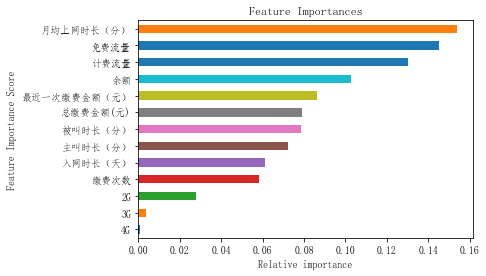

In [70]:
#使用模型modelfit评估函数进行评估
modelfit(gsearch3.best_estimator_, X_train, y_train)

#### 4. 调试决策树的相关参数：max_features
固定参数learning_rate=0.2, n_estimators=80,max_depth=4, min_samples_split= 130,min_samples_leaf= 5,

In [71]:
#设置max_features的范围range(1,8,1)
param_test4 = {'max_features':range(1,8,1)}

#建立GradientBoostingClassifier的实例
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=4, 
                            min_samples_split=130, min_samples_leaf=5, 
                                       subsample=0.8, random_state=10)

#建立GridSearchCV实例
gsearch4 = GridSearchCV(estimator,param_grid = param_test4, scoring='roc_auc',
                        n_jobs=4,iid=False, cv=5)

#在训练集上训练
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=130,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(1, 8)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [74]:
#显示网格检索的最优分数，最优参数，最优模型
#约3行代码：
print(gsearch4.best_score_)
print(gsearch4.best_params_)
print(gsearch4.best_estimator_)

0.9985286116205716
{'max_features': 1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=130,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)



Model Report
Accuracy (Train): 0.9934
AUC Score (Train): 0.999570
CV Score : Mean - 0.9985286 | Std - 0.0002656001 | Min - 0.9982873 | Max - 0.9990452


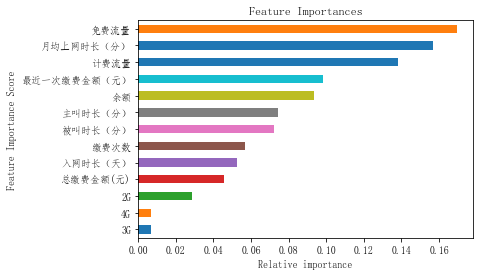

In [75]:
#使用模型modelfit评估函数进行评估
modelfit(gsearch4.best_estimator_,X_train,y_train)

### Step3：调试子样本数Subsample和学习率 Learning Rate
Tune Subsample and Lower Learning Rate

#### 调试子样本数Subsample  
固定参数learning_rate=0.2, n_estimators=80,max_depth=4, min_samples_split= 130,min_samples_leaf= 5,

In [77]:
#设置subsample范围为 [0.6,0.7,0.75,0.8,0.85,0.9]
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}


#建立GradientBoostingClassifier的实例
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=70,max_depth=5, 
                            min_samples_split=170, min_samples_leaf=20, 
                                       max_features=1, random_state=10)

#建立GridSearchCV实例
gsearch5 = GridSearchCV(estimator,param_grid = param_test5, scoring='roc_auc',
                        n_jobs=4,iid=False, cv=5)

#在训练集上训练
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [78]:
#显示网格检索的最优分数，最优参数，最优模型
#约3行代码：
print(gsearch5.best_score_)
print(gsearch5.best_params_)
print(gsearch5.best_estimator_)

0.9985828756347785
{'subsample': 0.6}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=170,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=10, subsample=0.6, verbose=0,
              warm_start=False)


#### 调试（降低）学习率，相应增加迭代次数
固定参数learning_rate=0.2, n_estimators=80,max_depth=4, min_samples_split= 130,min_samples_leaf= 5,sumsample=0.6  

Reducing the learning rate
With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get more robust results:


Model Report
Accuracy (Train): 0.9936
AUC Score (Train): 0.999573
CV Score : Mean - 0.9986389 | Std - 0.0001988925 | Min - 0.9984045 | Max - 0.9989968


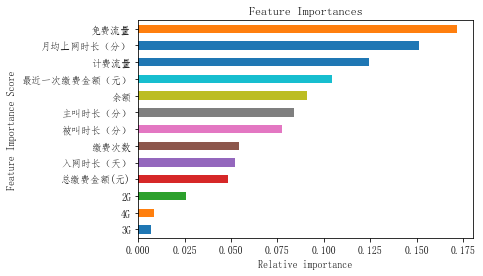

In [128]:
# 设置 learning_rate=0.1, n_estimators=160
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=160,
                                         max_depth=4,min_samples_split=130, min_samples_leaf=5, 
                                         max_features=1, subsample=0.6,random_state=10)

#使用模型modelfit评估函数进行评估
modelfit(gbm_tuned_1, X_train,y_train)


Model Report
Accuracy (Train): 0.9860
AUC Score (Train): 0.998940
CV Score : Mean - 0.9981113 | Std - 0.0004331504 | Min - 0.9974841 | Max - 0.998578


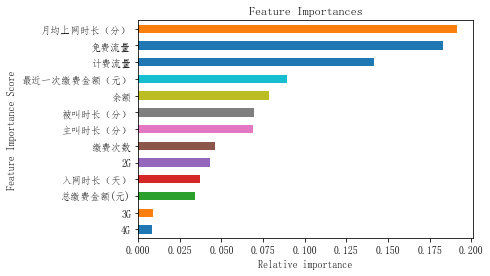

In [129]:
# 设置 learning_rate=0.05, n_estimators=320
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,
                                         max_depth=4,min_samples_split=130, min_samples_leaf=5, 
                                         max_features=1, subsample=0.6,random_state=10)

#使用模型modelfit评估函数进行评估
modelfit(gbm_tuned_2, X_train,y_train)


Model Report
Accuracy (Train): 0.9936
AUC Score (Train): 0.999623
CV Score : Mean - 0.9985826 | Std - 0.0003379941 | Min - 0.9980998 | Max - 0.9990687


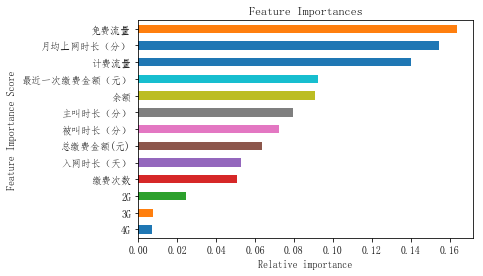

In [130]:
# learning_rate=0.01, n_estimators=1400
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1600,
                                         max_depth=4,min_samples_split=130, min_samples_leaf=5, 
                                         max_features=1, subsample=0.6,random_state=10)

#使用模型modelfit评估函数进行评估
modelfit(gbm_tuned_3, X_train,y_train)

## 使用最优超参再次在整个训练集上进行训练

In [131]:
#模型实例化
# learning_rate=0.01, n_estimators=1600
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1600,
                                         max_depth=4,min_samples_split=130, min_samples_leaf=5, 
                                         max_features=1, subsample=0.6,random_state=10)
#在训练集上训练模型
gbm_tuned_3.fit(X_train,y_train)

#在测试集上预测类别
y_pred = gbm_tuned_3.predict(X_test)
                                         
#在测试集上预测所属类别的概率
y_pred_proba = gbm_tuned_3.predict_proba(X_test)[:,1]

### 模型评估

In [37]:
#计算准确率
score = metrics.accuracy_score(y_test,y_pred)
print('The accuracy score of the model for test data is: {0}'.format(score))

#计算AUC值
auc_score = metrics.roc_auc_score(y_test,y_pred_proba)
print('The roc_auc_score of the model for test data is: {0}'.format(auc_score))

#查看混淆举证
print(metrics.confusion_matrix(y_test,y_pred))


The accuracy score of the model for test data is: 0.988
The roc_auc_score of the model for test data is: 0.9981893854726225
[[1036    2]
 [  22  940]]


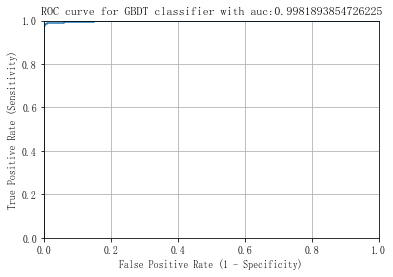

In [40]:
# 绘制ROC曲线
# IMPORTANT: first argument is true values, second argument is predicted probabilities
#fpr: false positive rate (=1- specifity), tpr = true postive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
#计算AUC值
auc_score = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for GBDT classifier with auc:{0}'.format(auc_score))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)